Import packages and dataset

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt

df_gen = pd.read_csv("CSV_Results/results_output_gen.csv")
df_gen

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,7.499999e-01,0.000000,12404.158194
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,6.980701e-01,0.000000,7104.798096
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,6.834167e-01,0.000000,4673.333760
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,1.113106e-01,0.000000,531.044032
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,9.355021e-08,0.000000,0.000309
...,...,...,...,...,...,...,...,...
5563,NO5,Nuclear,2035-2040,0.000197,0.000470,5.200406e-01,604.660300,0.002143
5564,NO5,Nuclear,2040-2045,0.000122,0.000593,4.498313e-01,256.465033,0.002336
5565,NO5,Nuclear,2045-2050,0.000582,0.001175,4.404490e-01,795.826835,0.004532
5566,NO5,Nuclear,2050-2055,0.000027,0.001201,4.895203e-01,21.115160,0.005151


All unique energy sources

In [16]:
df_gen["GeneratorType"].unique()

array(['Liginiteexisting', 'Lignite', 'LigniteCCSadv', 'Coalexisting',
       'Coal', 'CoalCCSadv', 'Gasexisting', 'GasOCGT', 'GasCCGT',
       'GasCCSadv', 'Oilexisting', 'Bioexisting', 'Bio10cofiring', 'Wave',
       'Geo', 'Hydroregulated', 'Hydrorun-of-the-river', 'Bio',
       'Windonshore', 'Windoffshoregrounded', 'Solar', 'Bio10cofiringCCS',
       'LigniteCCSsup', 'CoalCCS', 'GasCCS', 'Waste',
       'Windoffshorefloating', 'Nuclear'], dtype=object)

Select only offshore wind sources (floating and grounded)

In [20]:
df_ow = df_gen[(df_gen['GeneratorType'] == 'Windoffshorefloating') | (df_gen['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_floating = df_ow[(df_ow['GeneratorType'] == 'Windoffshorefloating')]
df_ow_grounded = df_ow[(df_ow['GeneratorType'] == 'Windoffshoregrounded')]
df_ow

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
3296,Belgium,Windoffshoregrounded,2020-2025,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
3297,Belgium,Windoffshoregrounded,2025-2030,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
3298,Belgium,Windoffshoregrounded,2030-2035,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
3299,Belgium,Windoffshoregrounded,2035-2040,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
3300,Belgium,Windoffshoregrounded,2040-2045,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...
5283,SorligeNordsjoII,Windoffshorefloating,2035-2040,1.220565e+04,12865.999817,0.517454,1.872286e+10,58320.207225
5284,SorligeNordsjoII,Windoffshorefloating,2040-2045,7.740523e-07,12865.999813,0.437684,7.598200e-01,49329.726326
5285,SorligeNordsjoII,Windoffshorefloating,2045-2050,2.446560e-04,12865.999972,0.469929,1.546626e+02,52963.931863
5286,SorligeNordsjoII,Windoffshorefloating,2050-2055,8.355961e-05,12865.999933,0.408990,3.010399e+01,46095.716681


Plot installed capacity (MW) by period

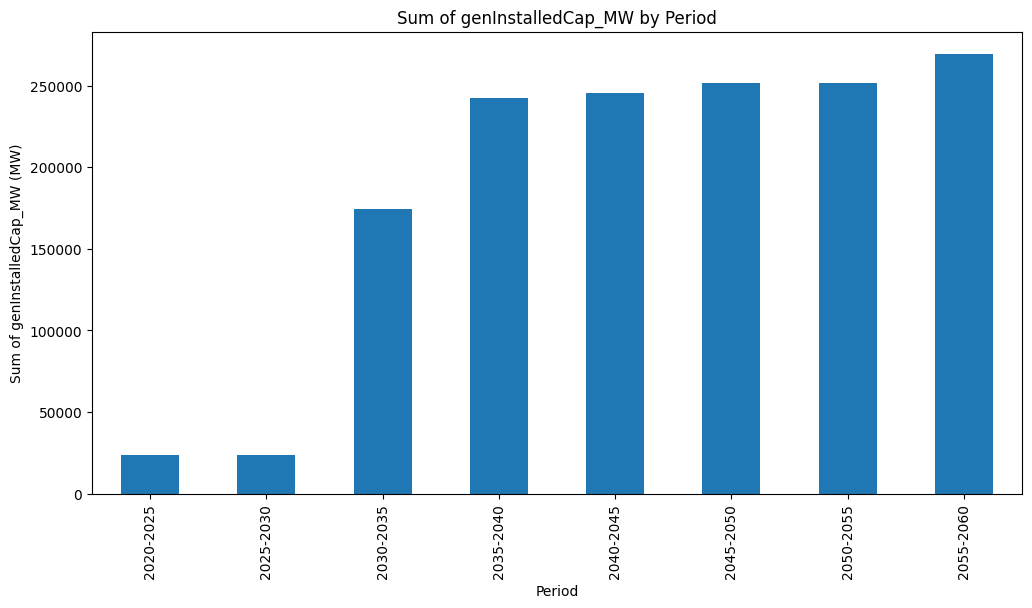

In [21]:
period_sum = df_ow.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()

Grounded capacity

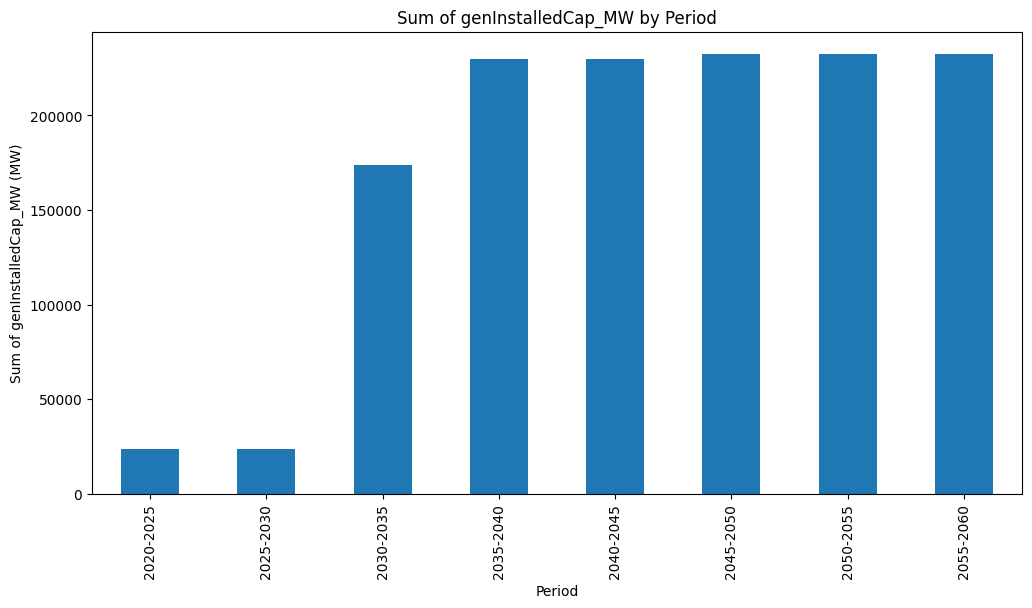

In [22]:
period_sum = df_ow_grounded.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()

Floating capacity

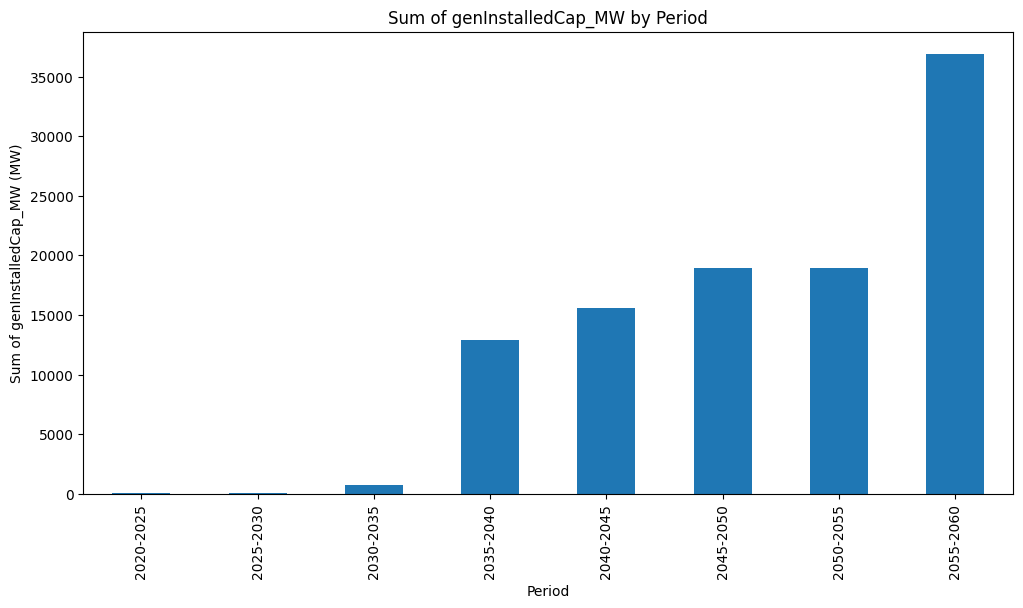

In [23]:
period_sum = df_ow_floating.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()

In Norway

In [27]:
df_gen["Node"].unique()

array(['BosniaH', 'Bulgaria', 'CzechR', 'Germany', 'Estonia', 'Greece',
       'Hungary', 'Ireland', 'Macedonia', 'Poland', 'Romania', 'Serbia',
       'Slovenia', 'Slovakia', 'Austria', 'Denmark', 'Spain', 'Finland',
       'France', 'GreatBrit.', 'Croatia', 'Italy', 'Latvia',
       'Netherlands', 'Portugal', 'Sweden', 'Belgium', 'Lithuania',
       'Luxemb.', 'Switzerland', 'NO1', 'NO2', 'NO3', 'NO4', 'NO5',
       'MorayFirth', 'FirthofForth', 'DoggerBank', 'Hornsea',
       'OuterDowsing', 'Norfolk', 'EastAnglia', 'Borssele',
       'HollandseeKust', 'HelgolanderBucht', 'Nordsoen', 'UtsiraNord',
       'SorligeNordsjoI', 'SorligeNordsjoII'], dtype=object)

In [33]:
nodes_to_include = ["UtsiraNord", "SorligeNordsjoI", "SorligeNordsjoII"]

# Use the isin method to filter the DataFrame
df_ow_NO = df_ow[df_ow['Node'].isin(nodes_to_include)]
df_ow_NO_floating = df_ow_NO[(df_ow_NO['GeneratorType'] == 'Windoffshorefloating')]
df_ow_NO_grounded = df_ow_NO[(df_ow_NO['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_NO["genInstalledCap_MW"].sum()

125885.42421819904

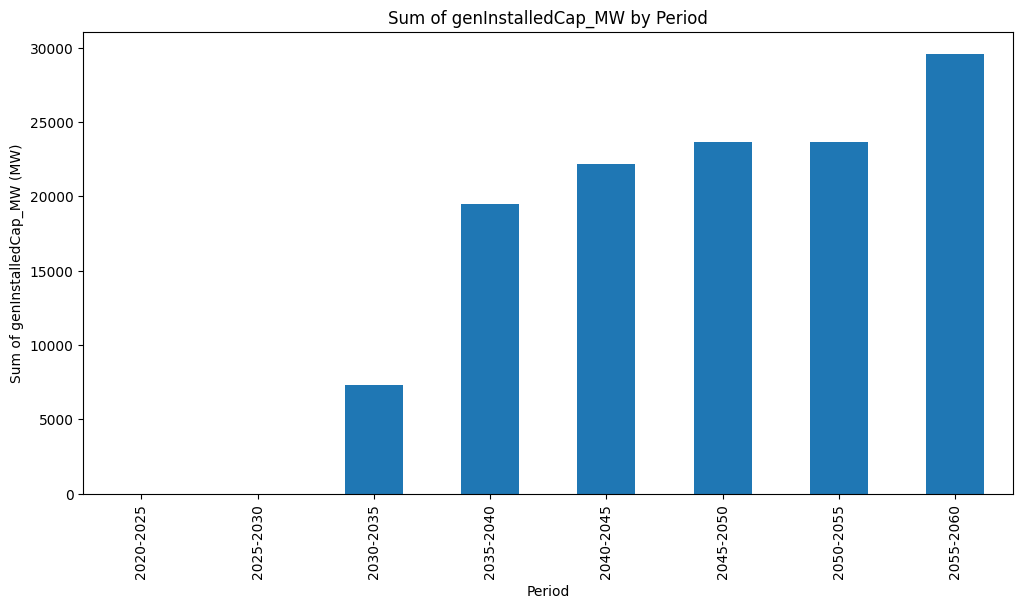

In [34]:
period_sum = df_ow_NO.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()

Floating

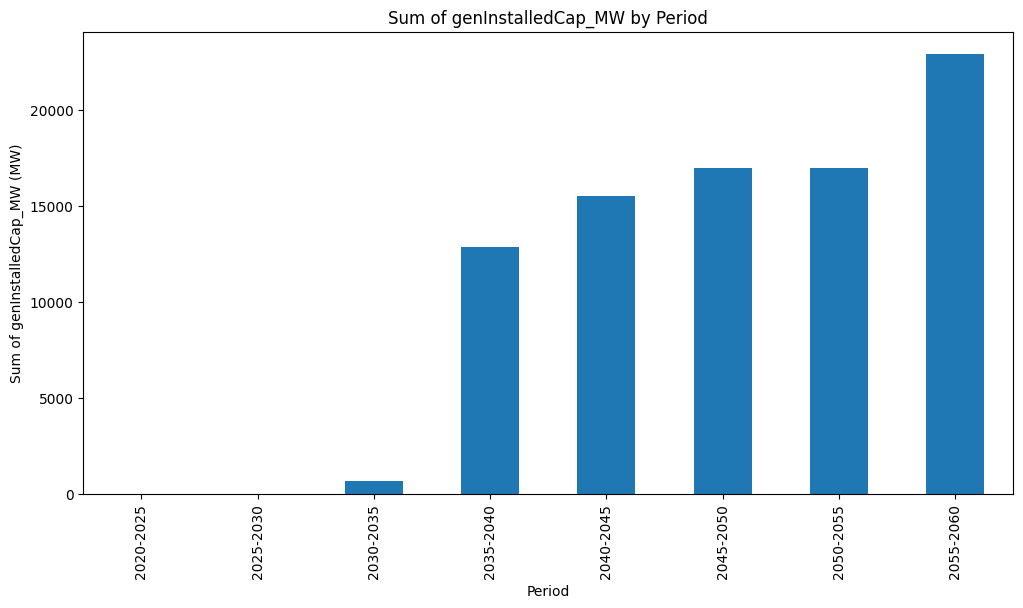

In [35]:
period_sum = df_ow_NO_floating.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()

Grounded

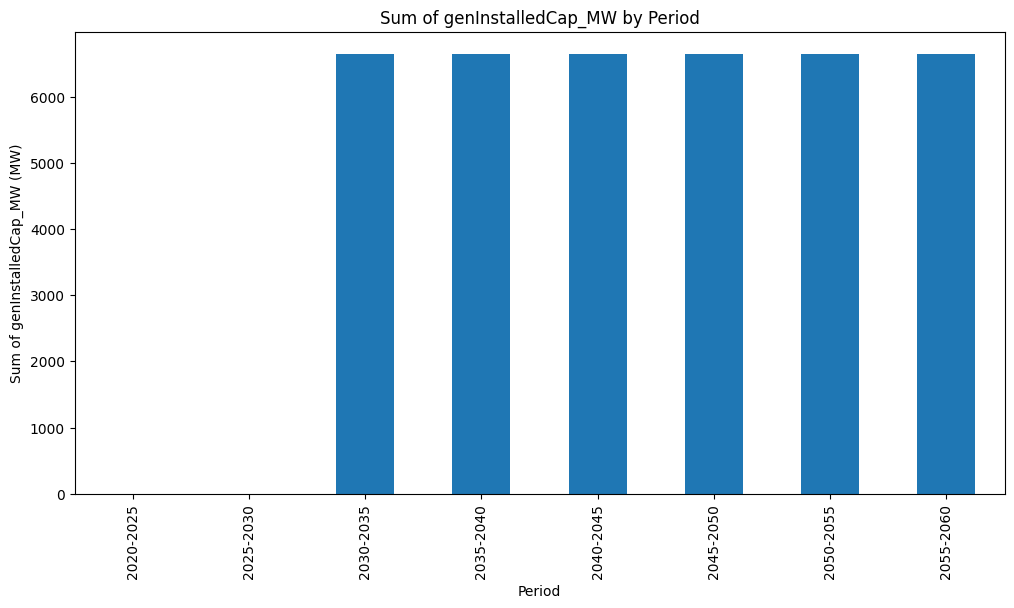

In [36]:
period_sum = df_ow_NO_grounded.groupby("Period")["genInstalledCap_MW"].sum()
period_sum.plot(kind='bar', figsize=(12, 6))
plt.title('Sum of genInstalledCap_MW by Period')
plt.xlabel('Period')
plt.ylabel('Sum of genInstalledCap_MW (MW)')
plt.show()